In [6]:
import sqlite3 

In [7]:
with sqlite3.connect("sales_data.db") as conn:
    cursor = conn.cursor()
    cursor.execute("DROP TABLE IF EXISTS sales")
    cursor.execute("CREATE TABLE sales (product TEXT, quantity INTEGER, price REAL)")
    data = [
        ("Laptop", 5, 60000),
        ("Mouse", 20, 500),
        ("Keyboard", 10, 1500),
        ("Monitor", 7, 8000),
        ("USB Cable", 15, 250)
    ]
    cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", data)
    conn.commit() 

In [9]:
import sqlite3 

In [10]:
with sqlite3.connect("sales_data.db") as conn:
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sales")
    rows = cursor.fetchall() 

In [11]:
for row in rows:
    print(row) 

('Laptop', 5, 60000.0)
('Mouse', 20, 500.0)
('Keyboard', 10, 1500.0)
('Monitor', 7, 8000.0)
('USB Cable', 15, 250.0)


In [12]:
import sqlite3 

In [14]:
import pandas as pd 

In [17]:
with sqlite3.connect("sales_data.db") as conn:
    query = """
    SELECT 
        product, 
        SUM(quantity) AS total_quantity, 
        SUM(quantity * price) AS total_revenue
    FROM sales
    GROUP BY product
    """
    df = pd.read_sql_query(query, conn) 

In [18]:
print(df) 

     product  total_quantity  total_revenue
0   Keyboard              10        15000.0
1     Laptop               5       300000.0
2    Monitor               7        56000.0
3      Mouse              20        10000.0
4  USB Cable              15         3750.0


In [1]:
import matplotlib.pyplot as plt

In [3]:
plt.figure(figsize=(7,5))
plt.bar(df['product'], df['total_revenue'], color='skyblue', edgecolor='black')

plt.title('💰 Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue (₹)')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

<Figure size 700x500 with 0 Axes>

In [4]:
import sqlite3

In [5]:
import pandas as pd

In [6]:
with sqlite3.connect("sales_data.db") as conn:
    query = """
    SELECT 
        product, 
        SUM(quantity) AS total_quantity, 
        SUM(quantity * price) AS total_revenue
    FROM sales
    GROUP BY product
    """
    df = pd.read_sql_query(query, conn)

In [7]:
print(df)

     product  total_quantity  total_revenue
0   Keyboard              10        15000.0
1     Laptop               5       300000.0
2    Monitor               7        56000.0
3      Mouse              20        10000.0
4  USB Cable              15         3750.0


C:\Users\irsha\AppData\Local\Temp\ipykernel_8112\2284203399.py:6: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


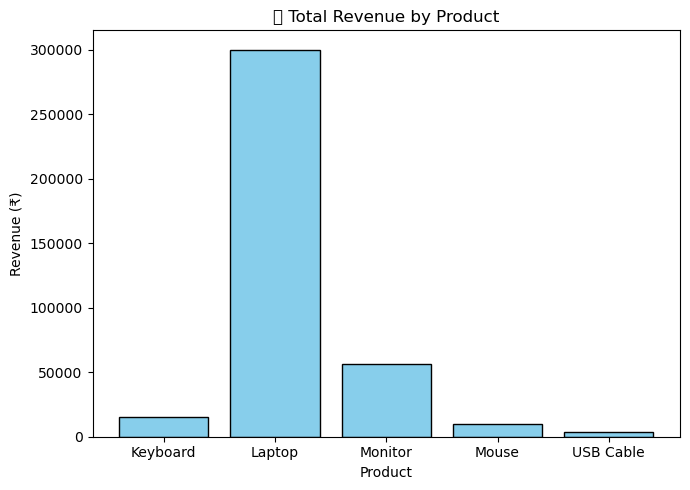

In [8]:
plt.figure(figsize=(7,5))
plt.bar(df['product'], df['total_revenue'], color='skyblue', edgecolor='black')
plt.title('💰 Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue (₹)')
plt.tight_layout()
plt.show()